In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/muham/OneDrive - TqPharma/Documents/Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Univariate Analysis
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

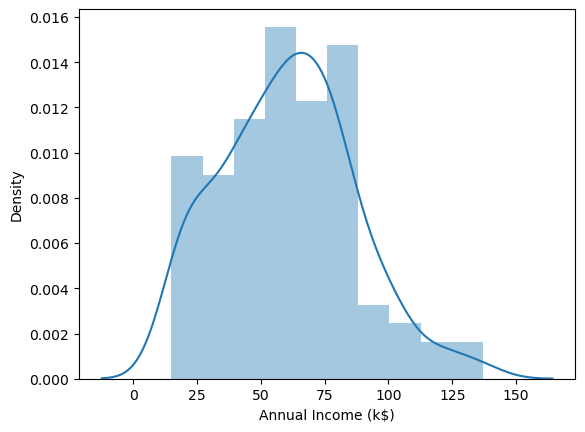

In [5]:
sns.distplot(df["Annual Income (k$)"])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

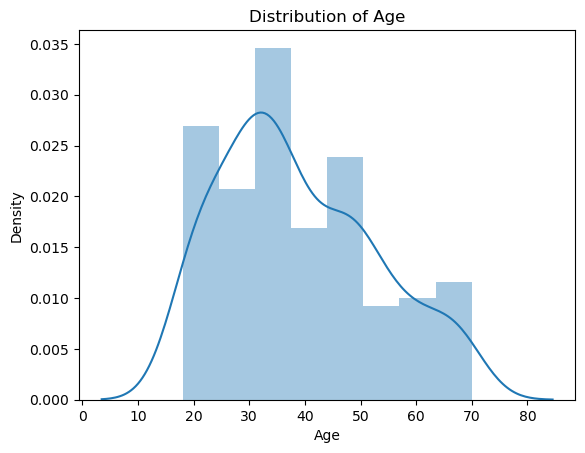

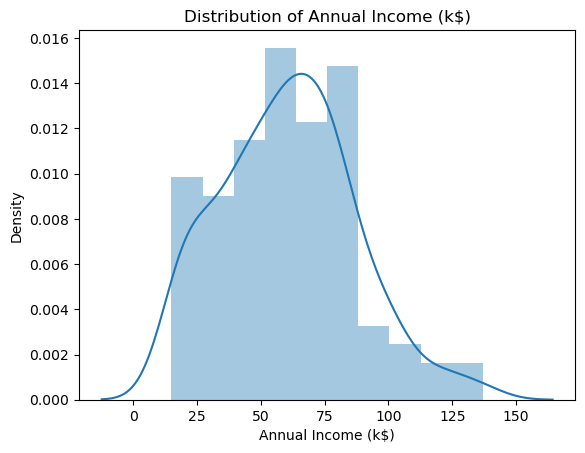

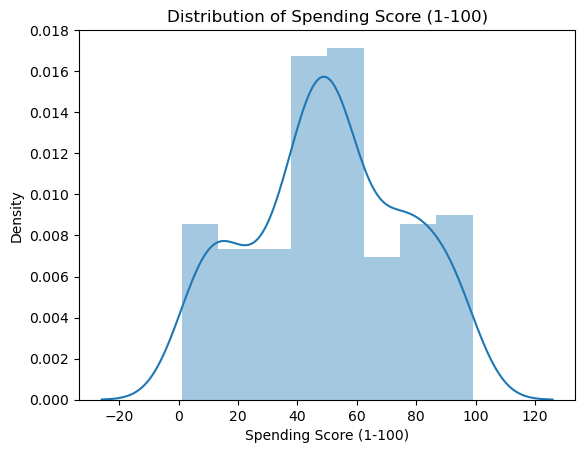

In [7]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()

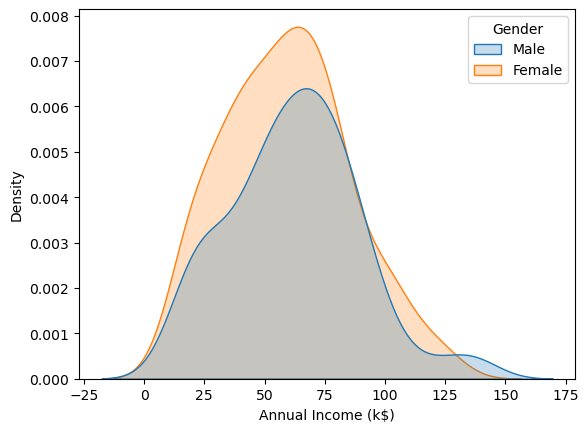

In [8]:
sns.kdeplot(data=df, x="Annual Income (k$)",hue="Gender",fill=True)
plt.show()

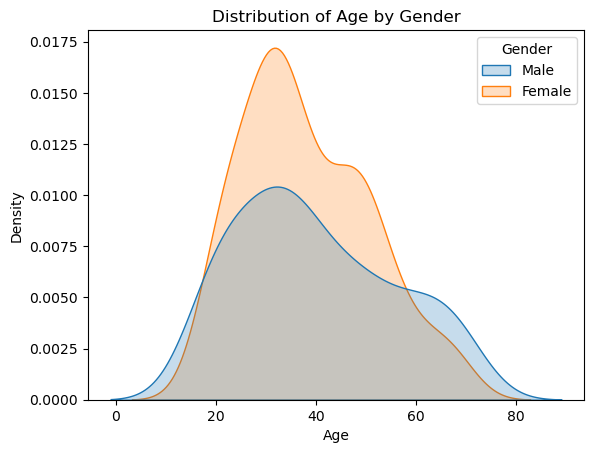

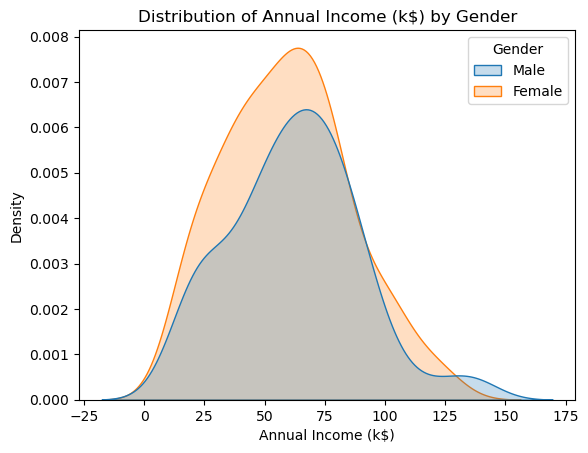

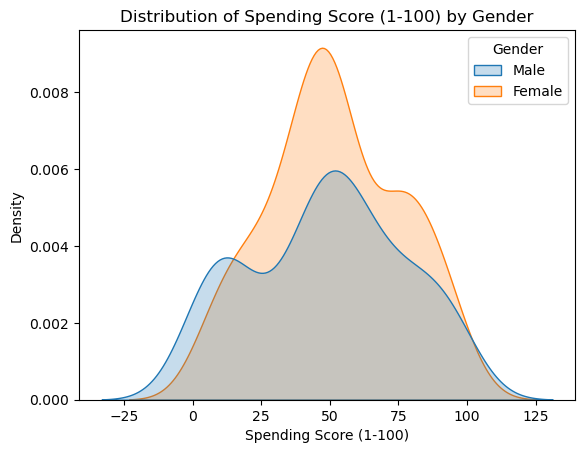

In [9]:

columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i,hue="Gender",fill=True)
    plt.title(f"Distribution of {i} by Gender")
    plt.show()

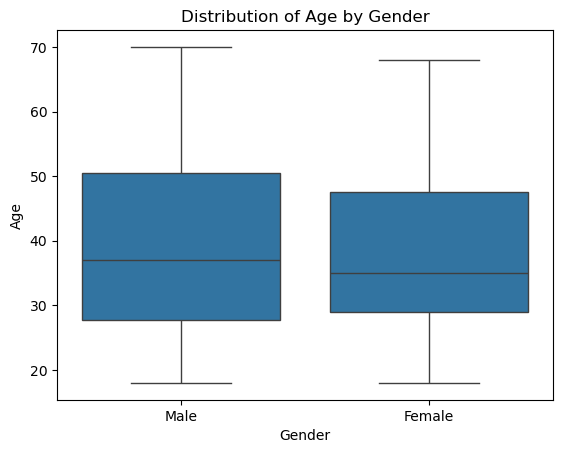

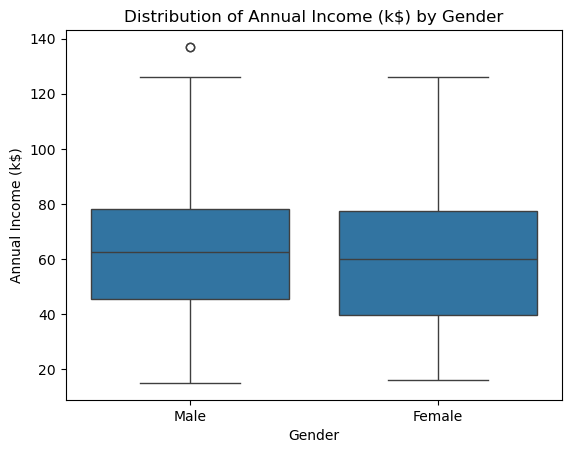

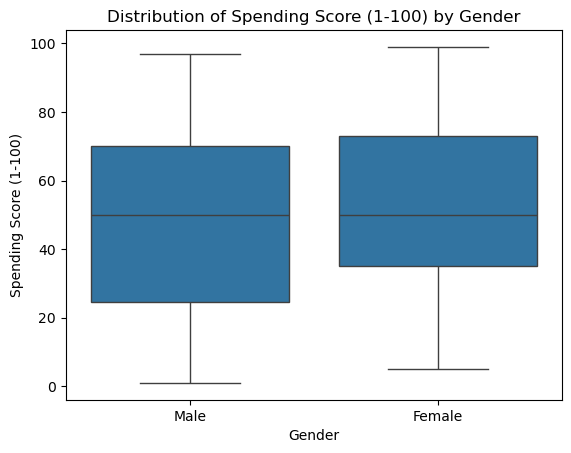

In [10]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i])
    plt.title(f"Distribution of {i} by Gender")
    plt.show()

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

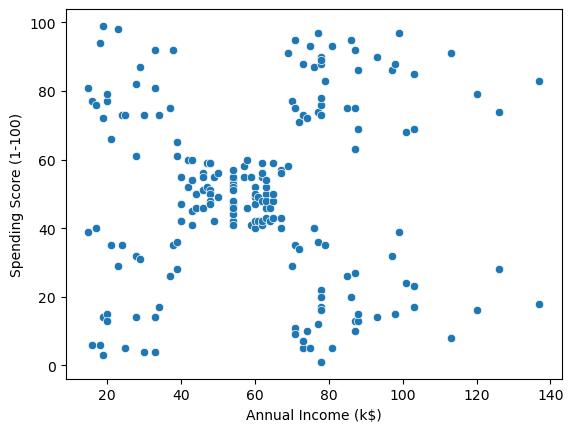

In [13]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')


In [14]:
%config IPCompleter.greedy=True

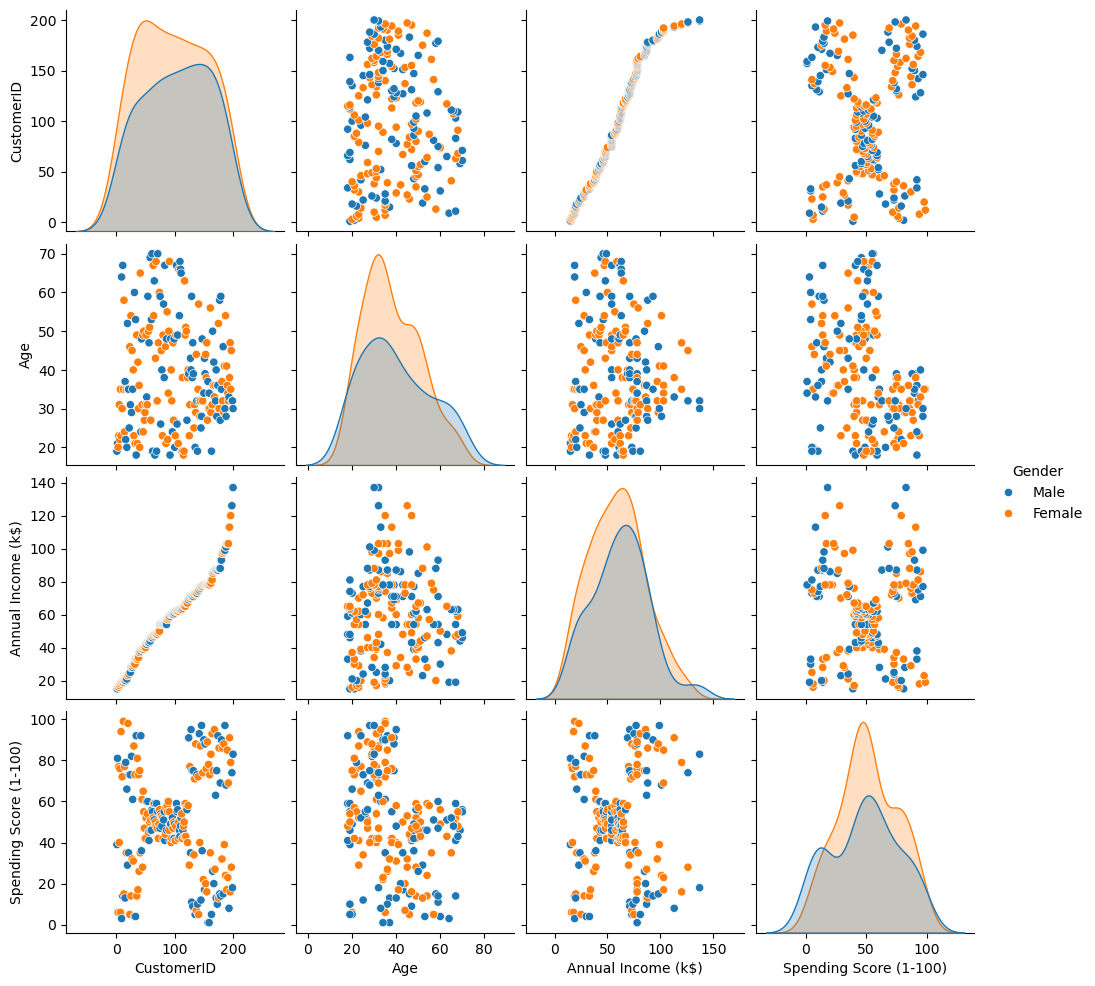

In [15]:
#df =df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [16]:
df.groupby('Gender')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
#df.corr(numeric_only=True)
# Exclude CustomerID only for correlation
df_corr = df.drop(columns=['CustomerID']).corr(numeric_only=True)

print(df_corr)



                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


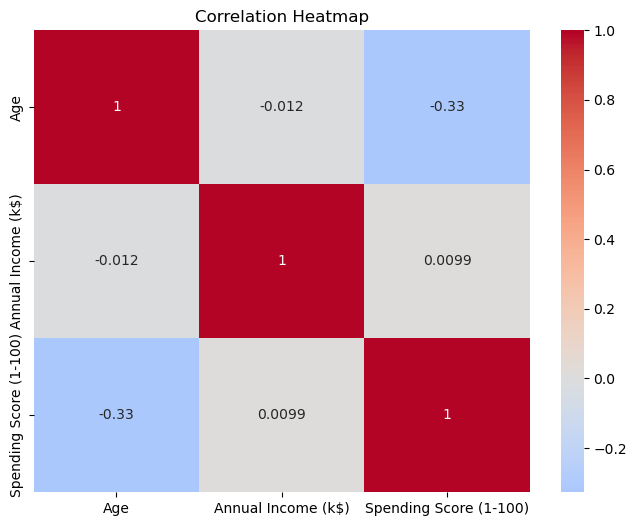

In [18]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


#clustering-Univariate,Bivariate,Multivariate


In [20]:
clustering1 =KMeans(n_clusters=6)


In [21]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [22]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
df['Income cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [24]:
df['Income cluster'].value_counts()

Income cluster
1    48
5    42
4    42
0    32
3    28
2     8
Name: count, dtype: int64

In [25]:
clustering1.inertia_

5050.9047619047615

In [26]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [27]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13844.222098218703,
 9384.57242757243,
 5415.939047619047,
 3931.9880952380945,
 2977.2424242424236,
 2320.588731443995,
 1910.0535650623892]

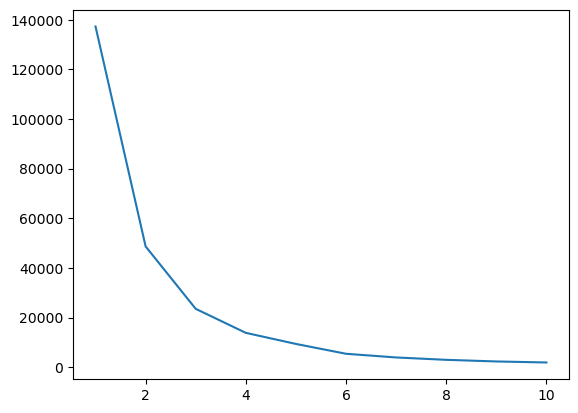

In [28]:
plt.plot(range(1,11),inertia_scores)

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income cluster'],
      dtype='object')

In [30]:
df.groupby('Income cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,34.906250,22.000000,49.656250
1,41.604167,60.083333,49.041667
2,36.500000,124.000000,49.625000
3,38.214286,93.000000,50.928571
4,35.428571,75.095238,51.095238
5,43.000000,42.238095,50.666667


#BIVARIATE CLUSTERING

In [32]:
clustering2 =KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2


In [33]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

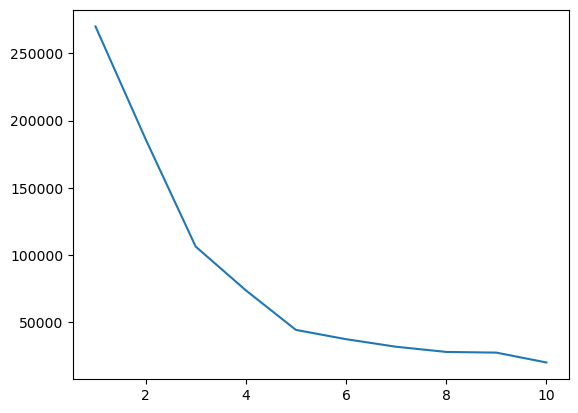

In [34]:

plt.plot(range(1,11),inertia_scores2)

In [46]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

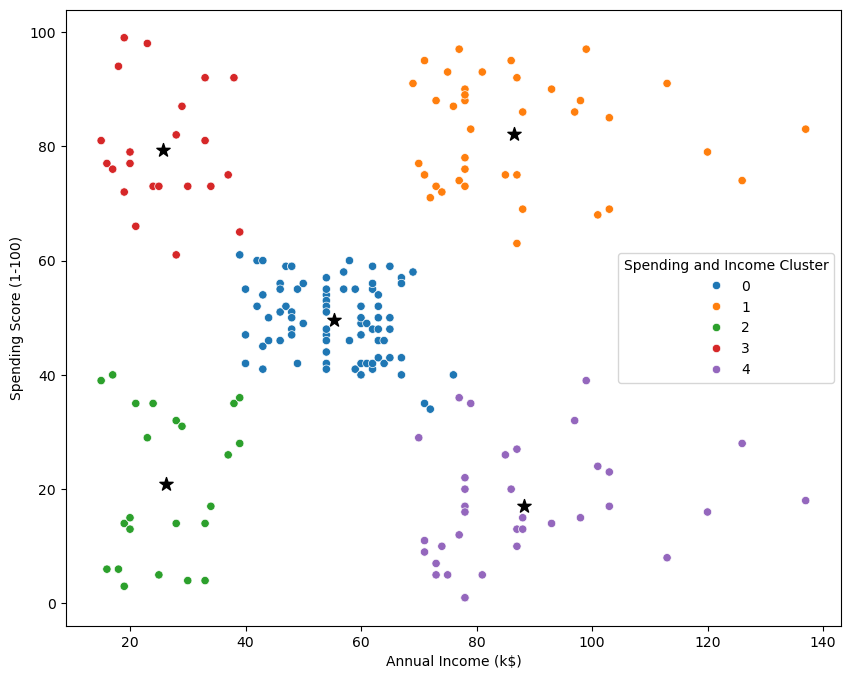

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y ='Spending Score (1-100)' , hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariate.png')

In [54]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')#percentage wise
pd.crosstab(df['Spending and Income Cluster'],df['Gender'])# count wise

Gender,Female,Male
Spending and Income Cluster,,
0,48,33
1,21,18
2,14,9
3,13,9
4,16,19


In [56]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
scale = StandardScaler()

In [68]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2


In [72]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,2,True
1,2,21,15,81,0,3,True
2,3,20,16,6,0,2,False
3,4,23,16,77,0,3,False
4,5,31,17,40,0,2,False


In [74]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [80]:
dff = dff[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [82]:
dff = scale.fit_transform(dff)

In [84]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [88]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

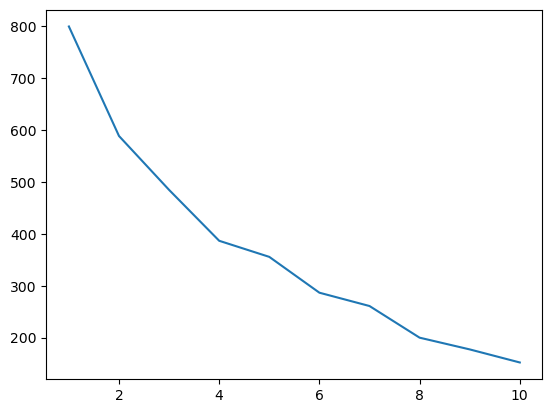

In [90]:
plt.plot(range(1,11),inertia_scores3)

In [92]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,2,4


In [94]:
df.to_csv('Clustering.csv')